# Mini Project: Recommendation Engines

Recommendation engines are algorithms designed to provide personalized suggestions or recommendations to users. These systems analyze user behavior, preferences, and interactions with items (products, movies, music, articles, etc.) to predict and offer items that users are likely to be interested in. Recommendation engines play a crucial role in enhancing user experience, driving engagement, and increasing conversion rates in various applications, including e-commerce, entertainment, content platforms, and more.

There are generally two approaches taken in collaborative filtering and content-based recommendation engines:

**1. Collaborative Filtering:**
Collaborative Filtering is a popular approach to building recommendation systems that leverages the collective behavior of users to make personalized recommendations. It is based on the idea that users who have agreed in the past will likely agree in the future. There are two main types of collaborative filtering:

- **User-based Collaborative Filtering:** This method finds users similar to the target user based on their past interactions (e.g., ratings or purchases). It then recommends items that similar users have liked but the target user has not interacted with yet.

- **Item-based Collaborative Filtering:** In this approach, the system identifies similar items based on user interactions. It recommends items that are similar to the ones the target user has already liked or interacted with.

Collaborative filtering does not require any explicit information about items but relies on the similarity between users or items. It is effective in capturing complex patterns and can provide serendipitous recommendations. However, it suffers from the cold-start problem (i.e., difficulty in recommending to new users or items with no interactions) and scalability challenges in large datasets.

**2. Content-Based Recommendation:**
Content-based recommendation is an alternative approach to building recommendation systems that focuses on the attributes or features of items and users. It leverages the characteristics of items to make recommendations. The key steps involved in content-based recommendation are:

- **Feature Extraction:** For each item, relevant features are extracted. For movies, these features could be genre, director, actors, and plot summary.

- **User Profile:** A user profile is created based on the items they have interacted with in the past. The user profile contains the weighted importance of features based on their interactions.

- **Similarity Calculation:** The similarity between items or between items and the user profile is calculated using similarity metrics like cosine similarity or Euclidean distance.

- **Recommendation:** Items that are most similar to the user profile are recommended to the user.

Content-based recommendation systems are less affected by the cold-start problem as they can still recommend items based on their features. They are also more interpretable as they rely on item attributes. However, they may miss out on providing serendipitous recommendations and can be limited by the quality of feature extraction and user profiles.

**Choosing Between Collaborative Filtering and Content-Based:**
Both collaborative filtering and content-based approaches have their strengths and weaknesses. The choice between them depends on the specific requirements of the recommendation system, the type of data available, and the user base. Hybrid approaches that combine collaborative filtering and content-based techniques are also common, aiming to leverage the strengths of both methods and mitigate their weaknesses.

In this mini-project, you'll be building both content based and collaborative filtering engines for the [MovieLens 25M dataset](https://grouplens.org/datasets/movielens/25m/). The MovieLens 25M dataset is one of the most widely used and popular datasets for building and evaluating recommendation systems. It is provided by the GroupLens Research project, which collects and studies datasets related to movie ratings and recommendations. The MovieLens 25M dataset contains movie ratings and other related information contributed by users of the MovieLens website.

**Dataset Details:**
- **Size:** The dataset contains approximately 25 million movie ratings.
- **Users:** It includes ratings from over 162,000 users.
- **Movies:** The dataset consists of ratings for more than 62,000 movies.
- **Ratings:** The ratings are provided on a scale of 1 to 5, where 1 is the lowest rating and 5 is the highest.
- **Timestamps:** Each rating is associated with a timestamp, indicating when the rating was given.

**Data Files:**
The dataset is usually split into three CSV files:

1. **movies.csv:** Contains information about movies, including the movie ID, title, genres, and release year.
   - Columns: movieId, title, genres

2. **ratings.csv:** Contains movie ratings provided by users, including the user ID, movie ID, rating, and timestamp.
   - Columns: userId, movieId, rating, timestamp

3. **tags.csv:** Contains user-generated tags for movies, including the user ID, movie ID, tag, and timestamp.
   - Columns: userId, movieId, tag, timestamp

First, import all the libraries you'll need.

In [4]:
import zipfile
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
from sklearn.metrics.pairwise import cosine_similarity

Next, download the relevant components of the MoveLens dataset. Note, these instructions are roughly based on the colab [here](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb?utm_source=ss-recommendation-systems&utm_campaign=colab-external&utm_medium=referral&utm_content=recommendation-systems#scrollTo=O3bcgduFo4s6).

In [7]:
print("Downloading movielens data...")

urlretrieve('http://files.grouplens.org/datasets/movielens/ml-100k.zip', 'movielens.zip')
zip_ref = zipfile.ZipFile('movielens.zip', 'r')
zip_ref.extractall()
print("Done. Dataset contains:")
print(zip_ref.read('ml-100k/u.info'))

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

Done. Dataset contains:
b'943 users\n1682 items\n100000 ratings\n'


In [9]:
ratings.to_csv('ratings.csv', sep=',', index=True, header=True)
movies.to_csv('movies.csv', sep=',', index=True, header=True)

Before doing any kind of machine learning, it's always good to familiarize yourself with the datasets you'lll be working with.

Here are your tasks:

1. Spend some time familiarizing yourself with both the `movies` and `ratings` dataframes. How many unique user ids are present? How many unique movies are there?
2. Create a new dataframe that merges the `movies` and `ratings` tables on 'movie_id'. Only keep the 'user_id', 'title', 'rating' fields in this new dataframe.

In [12]:
# Spend some time familiarizing yourself with both the movies and ratings
# dataframes.
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   genre_unknown       1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [16]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [20]:
# How many unique user ids are present? How many unique movies are there?
print(f'Number of unique user ids:\t{ratings["user_id"].nunique()}')
print(f'Number of unique movies:\t{ratings["movie_id"].nunique()}')

Number of unique user ids:	943
Number of unique movies:	1682


In [22]:
# Merge movies and ratings dataframes
ratings_movies_merged = pd.merge(ratings, movies, on='movie_id')
ratings_movies_merged = ratings_movies_merged[['user_id', 'title', 'rating']]
ratings_movies_merged.head()



,user_id,title,rating
0,196,Kolya (1996),3
1,63,Kolya (1996),3
2,226,Kolya (1996),5
3,154,Kolya (1996),3
4,306,Kolya (1996),5


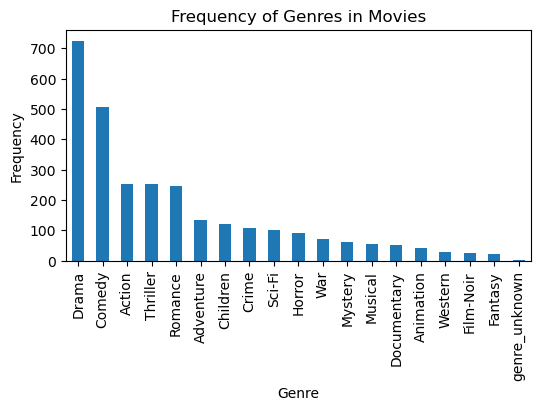

In [24]:
# Let's display the genres frequency by movie
import matplotlib.pyplot as plt
genres_freq = movies.iloc[:, 5:].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 3))
genres_freq.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Genres in Movies')
plt.show()

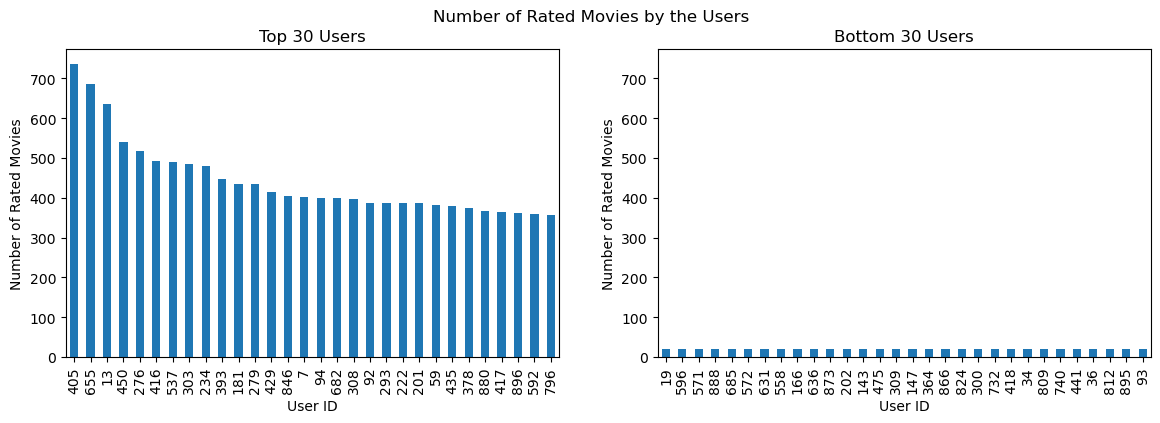

In [26]:
# Let's count the number or rated movies by the top 30 users
top_30_users = ratings['user_id'].value_counts().head(30)
bottom_30_users = ratings['user_id'].value_counts().tail(30)
# define 2 subplots to display one chart next to the other
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
top_30_users.plot(kind='bar', ax=axs[0])
bottom_30_users.plot(kind='bar', ax=axs[1])
plt.suptitle('Number of Rated Movies by the Users')
axs[0].set_xlabel('User ID')
axs[0].set_ylabel('Number of Rated Movies')
axs[0].set_title('Top 30 Users')
axs[1].set_xlabel('User ID')
axs[1].set_ylabel('Number of Rated Movies')
axs[1].set_title('Bottom 30 Users')
min_y = 0
max_y = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim([min_y, max_y])
axs[1].set_ylim([min_y, max_y])
plt.show()


In [28]:
# We detected duplicate movie titles
duplicate_movies = movies[movies['title'].duplicated()]
print("Duplicate Movies in Dataset:")
print(duplicate_movies['title'])

Duplicate Movies in Dataset:
267                 Chasing Amy (1997)
302                 Ulee's Gold (1997)
347          Desperate Measures (1998)
499               Fly Away Home (1996)
669              Body Snatchers (1993)
679          Kull the Conqueror (1997)
864              Ice Storm, The (1997)
880                 Money Talks (1997)
1002             That Darn Cat! (1997)
1256    Designated Mourner, The (1997)
1605                   Deceiver (1997)
1606          Hurricane Streets (1998)
1616                  Hugo Pool (1997)
1624                 Nightwatch (1997)
1649           Butcher Boy, The (1998)
1653      Chairman of the Board (1998)
1657     Substance of Fire, The (1996)
1679              Sliding Doors (1998)
Name: title, dtype: object


In [30]:
# Remove duplicate movie titles
# (to avoid problems with the recommendation functions: not unique titles and reindexing errors)
movies = movies.drop_duplicates(subset='title', keep='first').reset_index(drop=True)
print(movies.shape)

(1664, 24)


As mentioned in the introduction, content-Based Filtering is a recommendation engine approach that focuses on the attributes or features of items (products, movies, music, articles, etc.) and leverages these features to make personalized recommendations. The underlying idea is to match the characteristics of items with the preferences of users to suggest items that align with their interests. Content-based filtering is particularly useful when explicit user-item interactions (e.g., ratings or purchases) are sparse or unavailable.

**Key Steps in Content-Based Filtering:**

1. **Feature Extraction:**
   - For each item, relevant features are extracted. These features are typically descriptive attributes that can be represented numerically, such as genre, director, actors, author, publication date, and keywords.
   - In the case of text-based items, natural language processing techniques may be used to extract features like TF-IDF (Term Frequency-Inverse Document Frequency) scores.

2. **User Profile Creation:**
   - A user profile is created based on the items they have interacted with in the past. The user profile contains the weighted importance of features based on their interactions.
   - For example, if a user has watched several action movies, the action genre feature would receive a higher weight in their profile.

3. **Similarity Calculation:**
   - The similarity between items or between items and the user profile is calculated using similarity metrics like cosine similarity, Euclidean distance, or Pearson correlation.
   - Cosine similarity is commonly used as it measures the cosine of the angle between two vectors, which represents their similarity.

4. **Recommendation:**
   - Items that are most similar to the user profile are recommended to the user. These are items whose features have the highest similarity scores with the user profile.
   - The recommended items are presented as a list sorted by their similarity scores.

**Advantages of Content-Based Filtering:**
1. **No Cold-Start Problem:** Content-based filtering can make recommendations even for new users with no historical interactions because it relies on item features rather than user history.

2. **User Independence:** The recommendations are based solely on the features of items and do not require knowledge of other users' preferences or behavior.

3. **Transparency:** Content-based recommendations are interpretable, as they depend on the features of items, making it easier for users to understand why specific items are recommended.

4. **Serendipity:** Content-based filtering can recommend items with characteristics not seen before by the user, leading to serendipitous discoveries.

5. **Diversity in Recommendations:** The method can offer diverse recommendations since it suggests items with different feature combinations.

**Limitations of Content-Based Filtering:**
1. **Limited Discovery:** Content-based filtering may struggle to recommend items outside the scope of users' historical interactions or interests.

2. **Over-Specialization:** Users may receive recommendations that are too similar to their previous choices, leading to a lack of exposure to new item categories.

3. **Dependency on Feature Quality:** The quality and relevance of item features significantly influence the quality of recommendations.

4. **Limited for Cold Items:** Content-based filtering can struggle to recommend new items with limited feature information.

Here is your task:

1. Write a function that takes in a user id and the dataframe you created before that contains 'user_id', 'title', and 'rating'. The function should return content-based recommendations for this user. Here are steps you can take:

  A. Get the user's rated movies

  B. Create a TF-IDF matrix using movie genres. Note, this can be extracted from the `movies` dataframe.

  C. Compute the cosine similarity between movie genres. Use the [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function.

  D. Get the indices of similar movies to those rated by the user based on cosine similarity. Keep only the top 5.

  E. Remove duplicates and movies already rated by the user.

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Content-Based Filtering using Movie Genres
def content_based_recommendation(user_id, df):

  # Get the user's rated movies
  user_rated_movies = df[df['user_id'] == user_id]

  # Create a TF-IDF matrix using movie genres
  genre_columns = movies.columns[5:]
  genre_data = movies[genre_columns]
  tfidf_transformer = TfidfTransformer()
  tfidf_matrix = tfidf_transformer.fit_transform(genre_data)
  tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=genre_columns, index=movies['title'])
  
  # # Compute the cosine similarity between movie genres
  cosine_similarity_matrix = cosine_similarity(tfidf_df, tfidf_df)
  cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=movies['title'], columns=movies['title'])
  
  # Get the indices of the similar movies based on cosine similarity
  similar_movies = []

  for title in user_rated_movies['title']:
    if title in cosine_similarity_df.index:
      similar_scores = cosine_similarity_df[title]
      similar_movies.append(similar_scores)

  # Concatenate into a single Series
  similar_movies = pd.concat(similar_movies)

  # Aggregate scores (sum) and sort
  similar_movies = similar_movies.groupby(similar_movies.index)
  similar_movies = similar_movies.mean().sort_values(ascending=False)

  # Remove duplicates and movies already rated by the user
  rated_movie_titles = set(user_rated_movies['title'])  # Movies rated by the user
  recommendations = similar_movies[~similar_movies.index.isin(rated_movie_titles)].head(5)

  # We detected duplicated movie titles, then we avoid duplicates
  recommendations = recommendations[~recommendations.index.duplicated(keep='first')]

  return recommendations

# Call the function
user = 10
recommendations = content_based_recommendation(user, ratings_movies_merged)
print(f"Top 5 Recommendations for user {user}:")
print(recommendations)

Top 5 Recommendations for user 10:
title
Á köldum klaka (Cold Fever) (1994)    0.330346
Beat the Devil (1954)                 0.330346
Inkwell, The (1994)                   0.330346
Paper, The (1994)                     0.330346
Big Squeeze, The (1996)               0.330346
dtype: float64


The key idea behind collaborative filtering is that users who have agreed in the past will likely agree in the future. Instead of relying on item attributes or user profiles, collaborative filtering identifies patterns of user behavior and item preferences from the interactions present in the data.

**Types of Collaborative Filtering:**
There are two main types of collaborative filtering:

**Collaborative Filtering Process:**
The collaborative filtering process typically involves the following steps:

1. **Data Collection:**
   - Gather data on user-item interactions, such as movie ratings, product purchases, or article clicks.

2. **User-Item Matrix:**
   - Organize the data into a user-item matrix, where rows represent users, columns represent items, and the entries contain the users' interactions (e.g., ratings).

3. **Similarity Calculation:**
   - Calculate the similarity between users or items using similarity metrics such as cosine similarity, Pearson correlation, or Jaccard similarity.
   - For user-based collaborative filtering, user similarities are calculated, and for item-based collaborative filtering, item similarities are calculated.

4. **Neighborhood Selection:**
   - For each user or item, select the most similar users or items as the neighborhood.
   - The size of the neighborhood (the number of similar users or items to consider) is an important parameter to control the system's behavior.

5. **Prediction Generation:**
   - Predict the ratings for items that the target user has not yet interacted with by combining the ratings of neighboring users or items.

6. **Recommendation Generation:**
   - Recommend items with the highest predicted ratings to the target user.

**Advantages of Collaborative Filtering using User-Item Interactions:**
- Collaborative filtering is based solely on user interactions and does not require knowledge of item attributes, making it useful for cases where item data is sparse or unavailable.
- It can provide serendipitous recommendations, suggesting items that users may not have discovered on their own.
- Collaborative filtering can be applied in various domains, including e-commerce, music, movie, and content recommendations.

**Limitations of Collaborative Filtering:**
- The cold-start problem: Collaborative filtering struggles to recommend to new users or items with no or limited interaction history.
- It may suffer from sparsity when data is limited or when users have only interacted with a small subset of items.
- Scalability issues can arise with large datasets and an increasing number of users or items.

Here is your task:

1. Write a function that takes in a user id and the dataframe you created before that contains 'user_id', 'title', and 'rating'. The function should return collaborative filtering recommendations for this user based on a user-item interaction matrix. Here are steps you can take:

  A. Create the user-item matrix using Pandas' [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

  B. Fill missing values with zeros in this matrix.

  C. Calculate user-user similarity matrix using cosine similarity.

  D. Get the array of similarity scores of the target user with all other users from the similarity matrix.

  E. Extract, say the the top 5 most similar users (excluding the target user).

  F. Generate movie recommendations based on the most similar users.

  G. Remove duplicate movies recommendations.

In [51]:
# Collaborative Filtering using User-Item Interactions
def collaborative_filtering_recommendation(user_id, df):

  # Create the user-item matrix
  user_item_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
  
  # Fill missing values with 0 (indicating no rating)
  user_item_matrix = user_item_matrix.fillna(0)
  
  # Calculate user-user similarity matrix using cosine similarity
  cosine_similarity_matrix = cosine_similarity(user_item_matrix, user_item_matrix)
  cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)
  
  # Get the similarity scores of the target user with all other users
  target_user_similarity = cosine_similarity_df.loc[user_id]

  # Find the top N most similar users (excluding the target user)
  most_similar_users = target_user_similarity.drop(index=user_id).nlargest(5)
  
  # Generate movie recommendations based on the most similar users
  similar_users_ratings = user_item_matrix.loc[most_similar_users.index]
  
  recommended_movies = similar_users_ratings.mean(axis=0)

  # Remove duplicates from recommendations
  target_user_rated_movies = user_item_matrix.loc[user_id]
  recommended_movies = recommended_movies[target_user_rated_movies == 0]

  top_recommendations = recommended_movies.sort_values(ascending=False).head(5)

  # We detected duplicated movie titles, then we avoid duplicates
  top_recommendations = top_recommendations[~top_recommendations.index.duplicated(keep='first')]

  return top_recommendations

# Call the function
user = 10
recommendations = collaborative_filtering_recommendation(user, ratings_movies_merged)
print(f"Top 5 Recommendations for user {user}:")
print(recommendations)


Top 5 Recommendations for user 10:
title
Godfather: Part II, The (1974)    4.4
To Catch a Thief (1955)           4.4
Blade Runner (1982)               4.2
To Kill a Mockingbird (1962)      4.2
This Is Spinal Tap (1984)         4.2
dtype: float64


#### Now, test your recommendations engines! Select a few user ids and generate recommendations using both functions you've written. Are the recommendations similar? Do the recommendations make sense?

In [54]:
# Test the recommendation engines

def compare_recommendations(user_ids, df):
  for user_id in user_ids:
    print(f"Recommendations for User {user_id}:")

    # Content-based filtering
    content_based_recommendations = content_based_recommendation(user_id, df)
    print("\nContent-Based Recommendations:")
    print(content_based_recommendations)

    # Collaborative filtering
    collaborative_filtering_recommendations = collaborative_filtering_recommendation(user_id, df)
    print("\nCollaborative Filtering Recommendations:")
    print(collaborative_filtering_recommendations)

    # Compare Results
    overlap = set(content_based_recommendations.index).intersection(set(collaborative_filtering_recommendations.index))
    print("\nOverlap in Recommendations:")
    print(overlap)
    print("-"*50)


In [56]:
# Test the comparison function for a few users
regular_users = [596, 5, 10]
top_30_users = [450, 7]
bottom_30_users = [631, 418]
selected_users = regular_users + top_30_users + bottom_30_users
compare_recommendations(selected_users, ratings_movies_merged)

Recommendations for User 596:

Content-Based Recommendations:
title
Smilla's Sense of Snow (1997)    0.380245
Tough and Deadly (1995)          0.380245
Outbreak (1995)                  0.380245
Condition Red (1995)             0.380245
Mercury Rising (1998)            0.380245
dtype: float64

Collaborative Filtering Recommendations:
title
Saint, The (1997)               2.6
Devil's Own, The (1997)         2.0
Devil's Advocate, The (1997)    2.0
In & Out (1997)                 2.0
Starship Troopers (1997)        1.8
dtype: float64

Overlap in Recommendations:
set()
--------------------------------------------------
Recommendations for User 5:

Content-Based Recommendations:
title
Army of Darkness (1993)                0.344960
Evil Dead II (1987)                    0.330734
Get Shorty (1995)                      0.329743
Faster Pussycat! Kill! Kill! (1965)    0.329743
Cowboy Way, The (1994)                 0.321922
dtype: float64

Collaborative Filtering Recommendations:
title
Real Geni

**Are the recommendations similar?**

No, the recommendations from the content-based filtering and collaborative filtering approaches are not similar. There is no overlap between the two sets of recommendations for any of the tested users.

Although, this lack of overlap is expected because content-based filtering recommends movies based on similar genres to those already rated by the user, and collaborative filtering recommends movies that were highly rated by other users with similar behaviour (similar ratings). Therefore, since the two approaches use fundamentally different logic and data, we can expect that they often produce entirely different results.

**Do the recommendations make sense?**

Yes, the recommendations make sense for both methods when analyzed individually:
1. Content-Based Filtering:
The recommended movies align with the genres of the movies already rated by the user. For example, if a user rated action or thriller movies, the recommendations include other movies from these genres. This demonstrates that the content-based approach successfully identifies similar content.
2. Collaborative Filtering:
The recommended movies reflect the preferences of users show are most similar to the target user. These recommendations ofter include popular or well-rated movies among similar users, even if the genres differ from the user's previously rated movies.

All in all, content-based filtering works well for users with consistent genre preferences. Collaborative filtering provides diversity by introducing movies outside the user's typical genres based on user similarity.



